## import

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [2]:
diabetPath = "./DiabetesDataNormalized.txt"
T = np.loadtxt(diabetPath, delimiter=" ", skiprows=1)
y = T[:, 10]
X = T[:, :10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

## 3 Solve the Rigde regression problem and examine Bias and Variance for Ridge:

> (a) Derive (using pen and paper) the ridge regression solution by, as you would when minimizing any differentiable analytical function, differentiating $∥{\bf y} − {\bf X}β∥ + ∥β∥_2$ with respect to $β$, setting to zero and solving for $β$. That is, solve
$\frac{∂}{∂β} [∥y−Xβ∥_2^2+λ∥β∥_2^2]= 0$ for $β$.

$
    \frac{∂}{∂β} [∥y−Xβ∥_2^2+λ∥β∥_2^2] = \frac{∂}{∂β} [(y-Xβ)^T(y-Xβ)+λβ^Tβ]= \frac{∂}{∂β} [y^Ty - y^TXβ-β^TX^Ty+β^TX^TXβ+λβ^Tβ] = 
    = 0 - X^Ty- X^Ty + 2X^TXβ+λ2Iβ=0 
$

Rearranging it we get:

$
β=(X^TX+λI)^{-1}X^Ty
$

> (b) Compute ridge-regression solutions for the diabetes data set for 100 values of the regularization parameter in the range $10^{−4}$ to $10^3$. Plot the solutions as a function of this parameter. In the next lecture you will learn how to choose a single parameter value which suits the problem at hand.

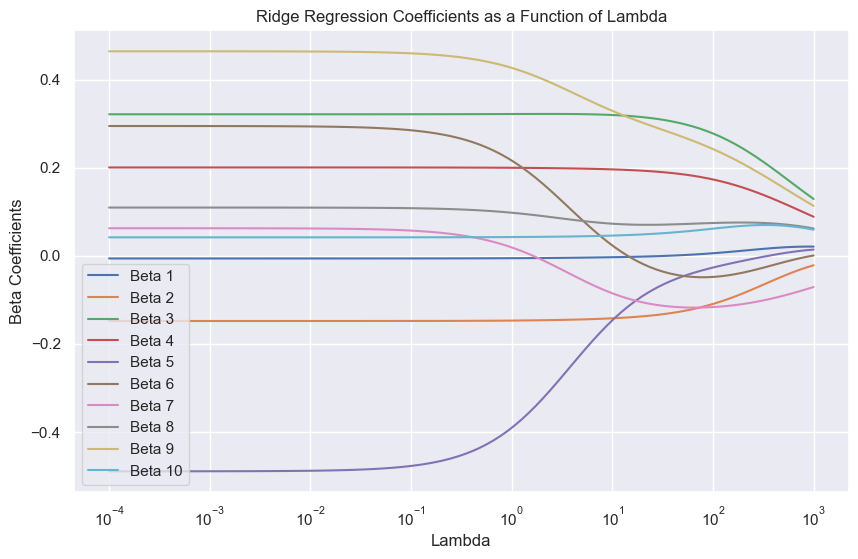

In [ ]:
# Create a method that computes the betas in ridge regression analytically
# given the design matrix, lambdas, number of independent variables
# and dependent values
def ridgeMulti(X, _lambda, p, y):
    I = np.eye(p)
    betas = np.linalg.inv(X.T @ X + _lambda * I) @ X.T @ y
    return betas


# make list of lambda values.
_lambda = np.logspace(-4, 3, 100)

# run ridge for all lambda values
betas = np.zeros((p, len(_lambda)))
for i, l in enumerate(_lambda):
    betas[:, i] = ridgeMulti(X, l, p, y)

# plot results
plt.figure(figsize=(10, 6))
for i in range(p):
    plt.plot(_lambda, betas[i, :], label=f"Beta {i+1}")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Beta Coefficients")
plt.title("Ridge Regression Coefficients as a Function of Lambda")
plt.legend()
plt.show()

How does the parameter estimates change when the regularization parameter increase?

What does this mean in terms of the bias of the model?

When the regularization parameter increases, the parameter estimates shrink towards zero. This means that the model becomes simpler and less sensitive to the training data, which can reduce variance but increase bias. In terms of bias, as the regularization parameter increases, the bias of the model increases because the model is less flexible and less able to capture the underlying patterns in the data. However, this trade-off can be beneficial if it leads to a significant reduction in variance, resulting in a more robust model that generalizes better to new data.

> (c) Change the experiment in exercise 2 to investigate bias and variance for ridge regression instead of OLS. Can you lower the variance without introducing too much bias?

In [12]:
# recreate the experiment from the last exercise
# you can reuse the code with some edits, and do similar plots to investigate
# the bias and variance of ridge


def estimate_betas(X, beta_true, sigma, _l):
    """

    Parameters:
    X (nXp matrix): feature matrix used for simulation
    true_betas (array): array of ture betas
    sigma (float): The noise level in the simulation
    _lambda (float): The trade-off parameter for ridge regression

    Returns:
    beta: the estimated betas

    """
    # Simulate observed data using the created feature matrix
    y_sim = X @ beta_true + np.random.normal(0, sigma, n)

    # Estimate of beta using ridge regression
    beta = np.linalg.inv(X.T @ X + _l * np.eye(p)) @ X.T @ y_sim
    return beta

Mean of True Betas: 2.0
Standard Deviation of True Betas: 0.816496580927726


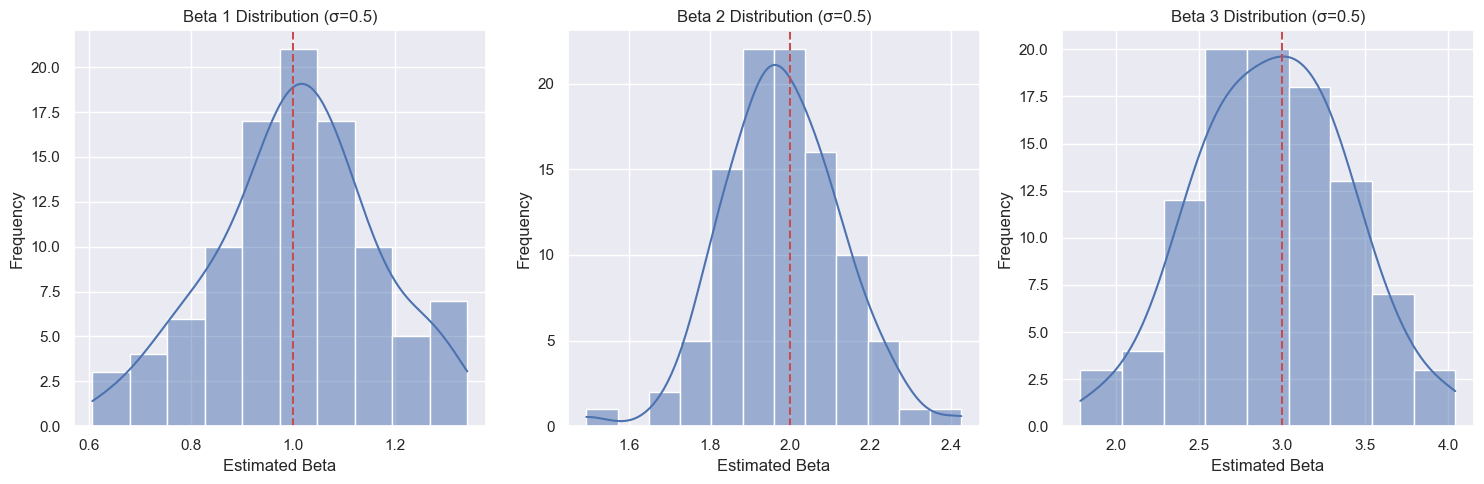

Noise Level (σ=0.5):
Lambda: 0.001
Mean of Estimated Betas: [1.00657781 1.98054269 2.94252354]
Standard Deviation of Estimated Betas: [0.15613203 0.1431239  0.45154988]




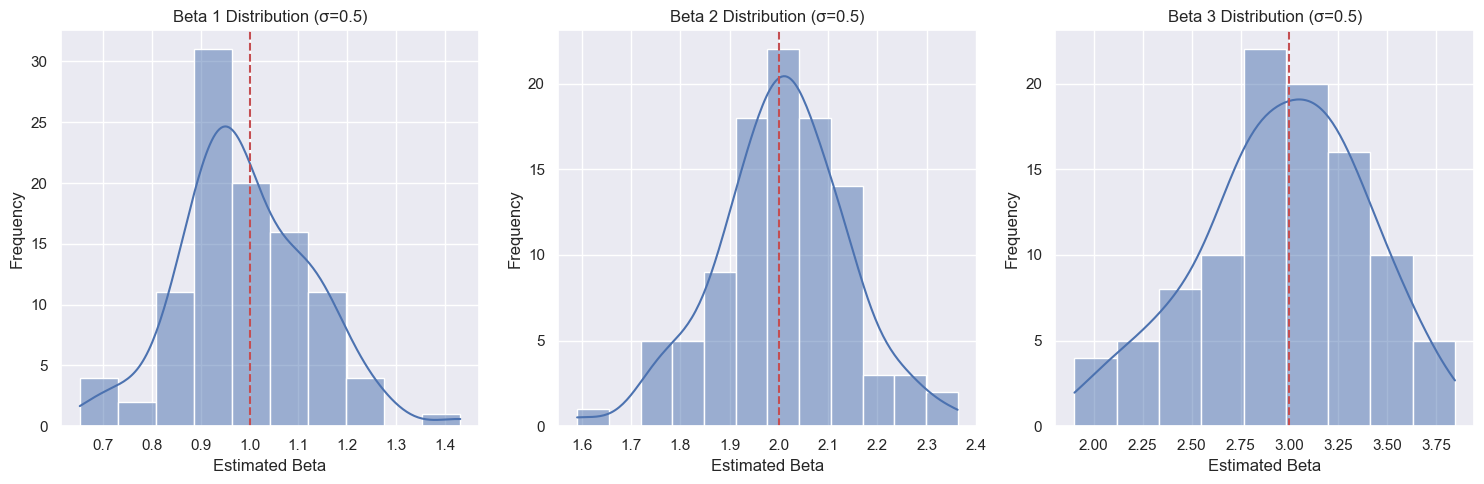

Noise Level (σ=0.5):
Lambda: 0.01
Mean of Estimated Betas: [0.99189606 2.00665286 2.96590468]
Standard Deviation of Estimated Betas: [0.13340979 0.13119208 0.41987861]




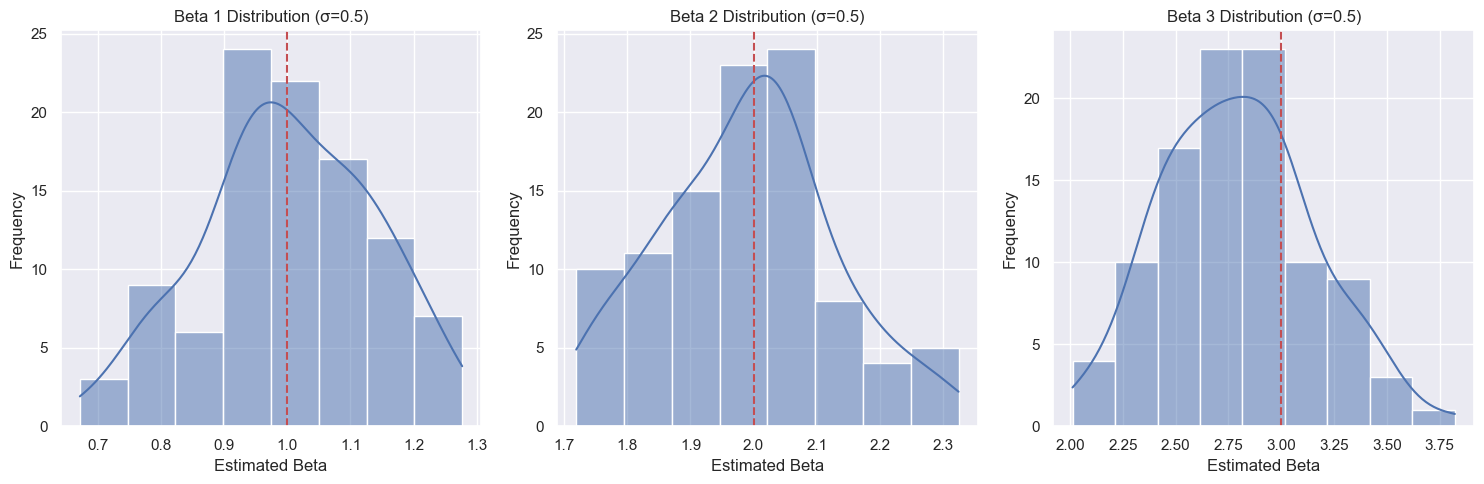

Noise Level (σ=0.5):
Lambda: 0.1
Mean of Estimated Betas: [1.00138429 1.98980885 2.7939666 ]
Standard Deviation of Estimated Betas: [0.13474825 0.13597075 0.35569744]




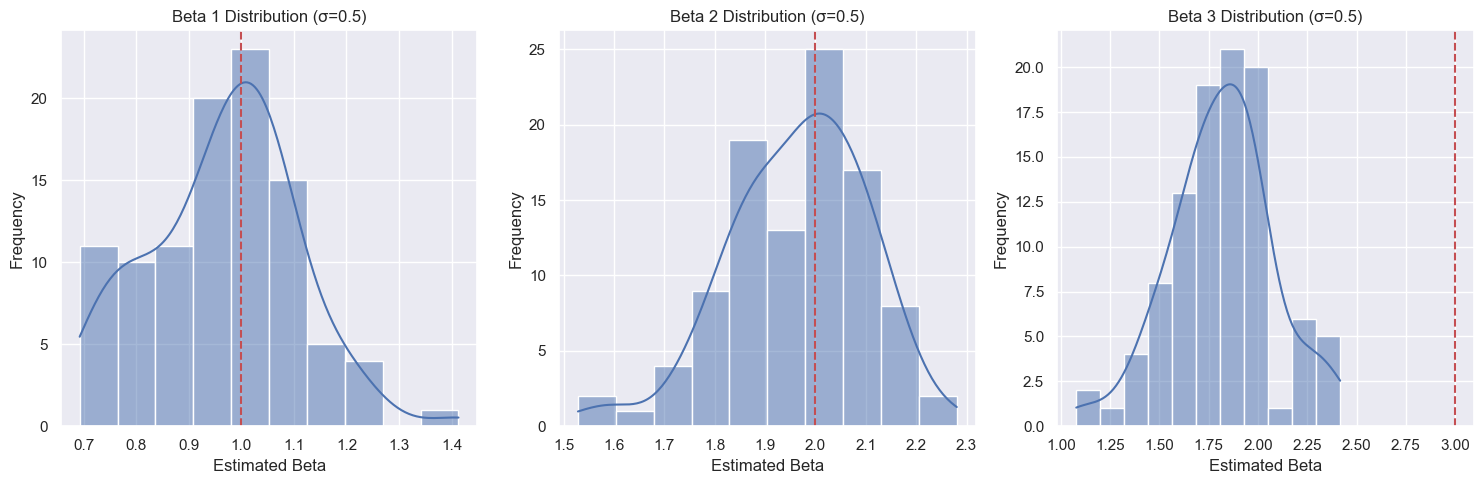

Noise Level (σ=0.5):
Lambda: 1.0
Mean of Estimated Betas: [0.96475283 1.96532065 1.81661718]
Standard Deviation of Estimated Betas: [0.1402629  0.13606237 0.26090793]




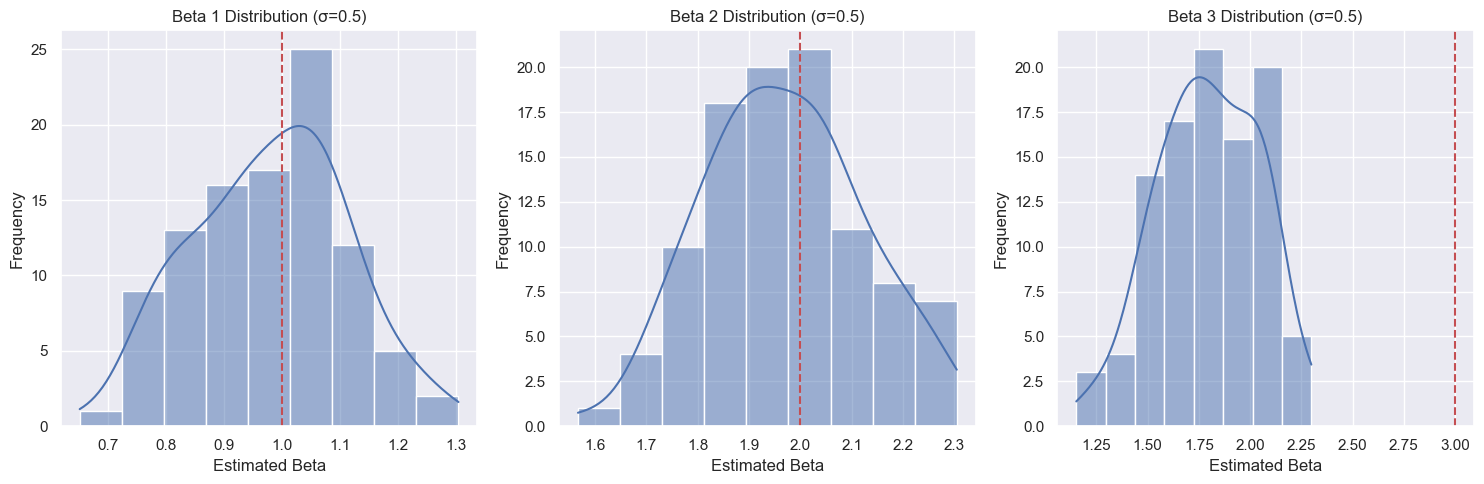

Noise Level (σ=0.5):
Lambda: 1.0
Mean of Estimated Betas: [0.98014018 1.96747639 1.7979973 ]
Standard Deviation of Estimated Betas: [0.13251701 0.1518079  0.24668808]




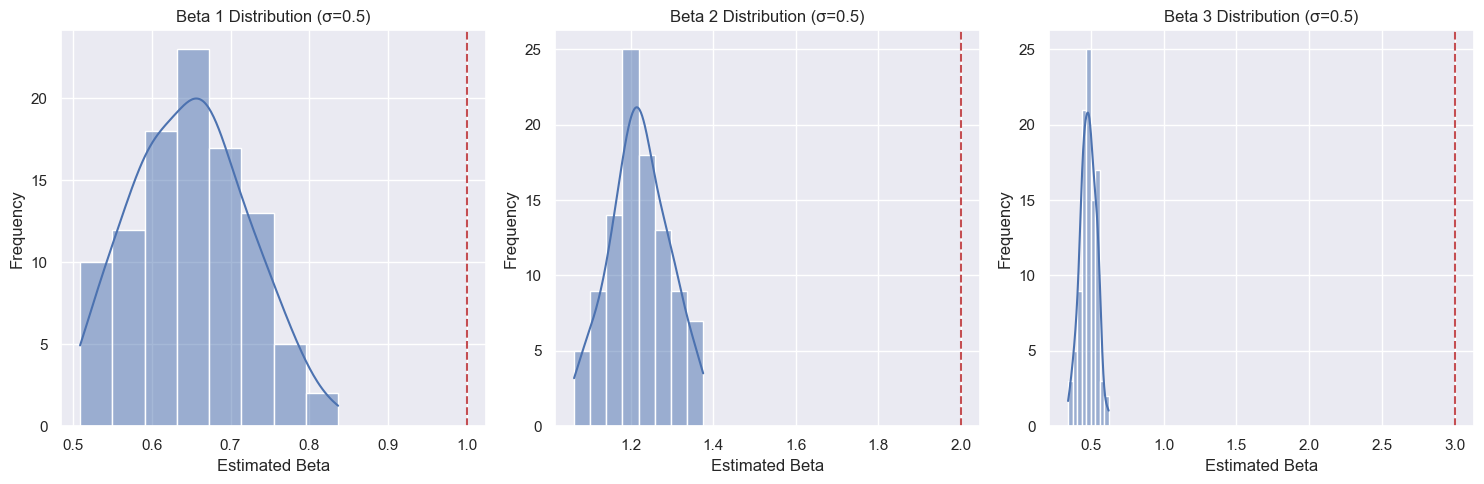

Noise Level (σ=0.5):
Lambda: 10.0
Mean of Estimated Betas: [0.64858973 1.22164689 0.48125029]
Standard Deviation of Estimated Betas: [0.07207573 0.071748   0.0538118 ]




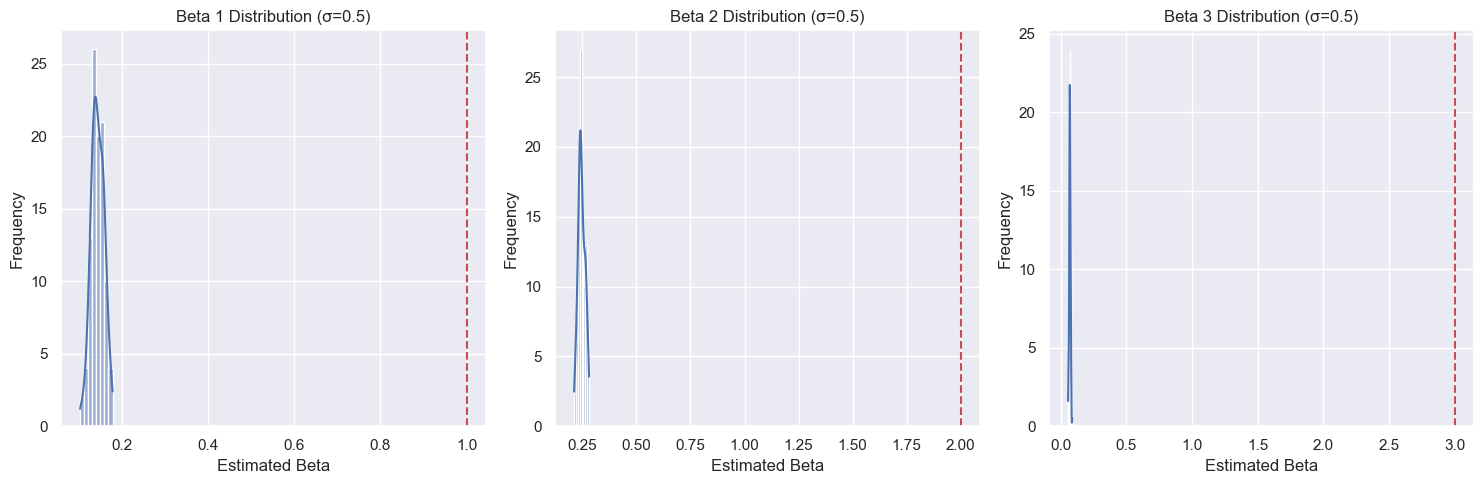

Noise Level (σ=0.5):
Lambda: 100.0
Mean of Estimated Betas: [0.14371706 0.2464344  0.06995507]
Standard Deviation of Estimated Betas: [0.01487947 0.01590389 0.00536786]




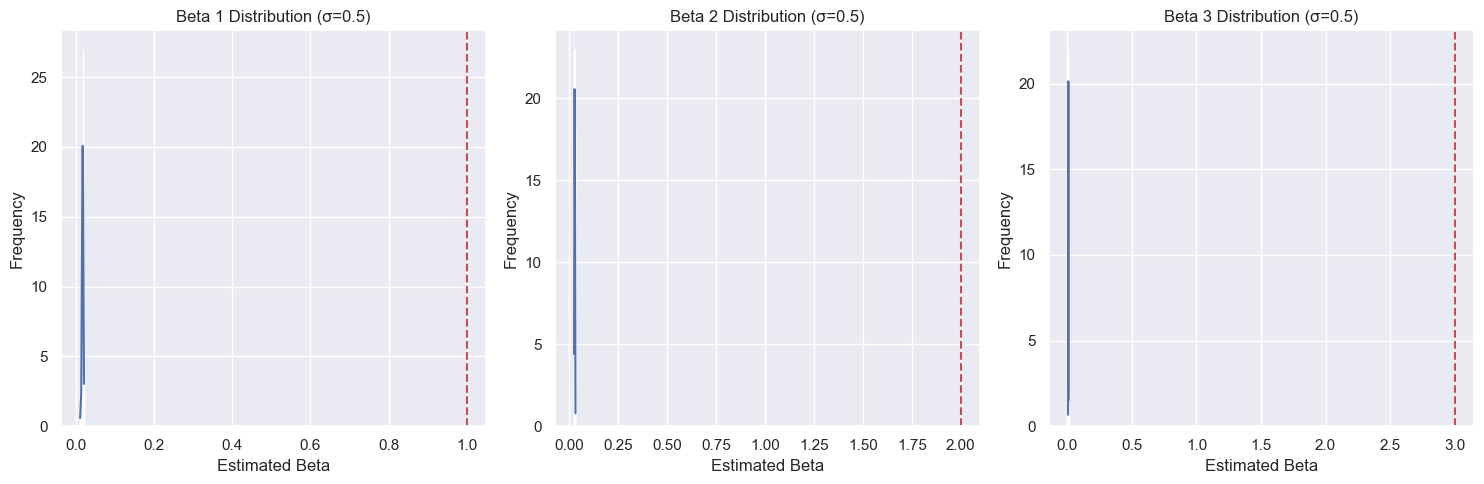

Noise Level (σ=0.5):
Lambda: 1000.0
Mean of Estimated Betas: [0.01644161 0.02713224 0.00736829]
Standard Deviation of Estimated Betas: [0.00184466 0.00151577 0.00060495]




In [21]:
# define true betas, n and p, and sigma
n = 10
p = 3
beta_true = np.array([1, 2, 3])

# Create a feature matrix either using np.random.normal or np.rand.randn
X = np.random.normal(0, 1, (10, 3))

m = 100  # number of experiments
betas = np.zeros((p, m))  # all variable estimates
estimate_betas(X, beta_true, 1, 0.1)


# Investigate the mean and variance of the betas that you have estimated from experiments with different noise levels
def plot_beta_distribution(betas, beta_true, sigma):
    fig, axes = plt.subplots(1, p, figsize=(15, 5))
    for j in range(p):
        sns.histplot(betas[j, :], kde=True, ax=axes[j])
        axes[j].axvline(beta_true[j], color="r", linestyle="--")
        axes[j].set_title(f"Beta {j+1} Distribution (σ={sigma})")
        axes[j].set_xlabel("Estimated Beta")
        axes[j].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()


mean_true_betas = np.mean(beta_true)
std_true_betas = np.std(beta_true)
print(f"Mean of True Betas: {mean_true_betas}")
print(f"Standard Deviation of True Betas: {std_true_betas}")

# Experiment with different noise levels
sigma = 0.5
_lambda = np.array([10e-4, 10e-3, 10e-2, 10e-1, 1, 10, 100, 1000])
for _l in _lambda:
    betas = np.zeros((p, m))
    for i in range(m):
        betas[:, i] = estimate_betas(X, beta_true, sigma, _l)
    plot_beta_distribution(betas, beta_true, sigma)
    mean_betas = np.mean(betas, axis=1)
    std_betas = np.std(betas, axis=1)
    print(f"Noise Level (σ={sigma}):")
    print(f"Lambda: {_l}")
    print(f"Mean of Estimated Betas: {mean_betas}")
    print(f"Standard Deviation of Estimated Betas: {std_betas}")
    print("\n")

What happens with the bias and variance as the regularization parameter increase?